<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Data-wrangling-and-cleaning" data-toc-modified-id="Data-wrangling-and-cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data wrangling and cleaning</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

# Loading data

In [2]:
#Load data
df1 = pd.read_csv('takehome_users.csv', parse_dates=['creation_time','last_session_creation_time'], encoding="ISO-8859-1")
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
import datetime

#Convert to datetime format
df1['creation_time'] = pd.to_datetime(df1['creation_time'])

#Convert timestamp to datetime format
df1['last_session_creation_time'] = df1['last_session_creation_time'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)) if x == x else np.nan)

#Fill na's with creation_time, this assumes the user never logged in after their creation time.
df1.last_session_creation_time.fillna(df1.creation_time, inplace = True)

#Convert to datetime 
df1['last_session_creation_time'] = pd.to_datetime(df1['last_session_creation_time'])

In [5]:
df1.head() 

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 20:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 03:14:20,0,0,193,5240.0


In [6]:
#Load second dataframe
df2= pd.read_csv('takehome_user_engagement.csv')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


# Data wrangling and cleaning

In [8]:
#Convert to datatime format
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'])

In [9]:
#Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period.
#7 day rolling average
rolling_df = df2.groupby('user_id').rolling('7D', on='time_stamp').visited.sum().reset_index()

#Create adoption column based on 7 day rolling dataframe 
rolling_df.visited = rolling_df['visited'].astype('int')
rolling_df['adoption'] = np.where(rolling_df['visited'] >= 3, 1, 0)

df_adopt = rolling_df.groupby('user_id').adoption.sum().reset_index(name ='adopted')

#view 10 sample rows from dataframe
df_adopt.sample(10)

,user_id,adopted
7535,10246,15
5456,7453,0
5093,6972,0
6704,9140,0
1052,1462,0
4908,6721,0
6223,8514,0
2337,3194,6
1879,2587,65
6430,8784,0


In [10]:
#Add column of total visits by user
df_adopt['tot_visits'] = df2.groupby('user_id')['visited'].count().to_frame()

In [11]:
#Convert the adopted to 1's and 0's
df_adopt['adopted'] = np.where(df_adopt['adopted'] >= 1, 1, 0)
df_adopt.head()

,user_id,adopted,tot_visits
0,1,0,NaN
1,2,1,1.0
2,3,0,14.0
3,4,0,1.0
4,5,0,1.0


In [12]:
print('Value counts of adoption')
print(df_adopt['adopted'].value_counts())
print('Dataframe shape:', df_adopt.shape)

Value counts of adoption
0    7221
1    1602
Name: adopted, dtype: int64
Dataframe shape: (8823, 3)


In [13]:
#Join the two dataframes
df = df1.join(df_adopt.set_index('user_id'), on ='object_id')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,tot_visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,10803.0,0.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 20:45:04,0,0,1,316.0,1.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1525.0,0.0,14.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,5151.0,0.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 03:14:20,0,0,193,5240.0,0.0,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted                     8823 non-null   float64       
 11  tot_visits                  6457 non-null   float64   

In [15]:
df.shape

(12000, 12)

In [16]:
#View values and na counts for adopted
df.adopted.value_counts(dropna=False)

0.0    7221
NaN    3177
1.0    1602
Name: adopted, dtype: int64

In [17]:
#Replace na's with 0 in adopted, assumes that if na is present they are not adopted
df.adopted.fillna(0, inplace = True)
df.adopted.value_counts(dropna = False)

0.0    10398
1.0     1602
Name: adopted, dtype: int64

In [18]:
#Replace na's in invited by user id, assumes that if na is present then no one invited them
df.invited_by_user_id.fillna(0, inplace = True)

#Replace na's in tot_visits, assumes that if na is present they did not visit
df.tot_visits.fillna(0, inplace = True)

In [19]:
#convert invited by column to boolean as either invited or not
df['invited_by_user_id'] = df.invited_by_user_id.astype('bool').astype('int')

In [20]:
df['invited_by_user_id'].value_counts(dropna = False)

1    6417
0    5583
Name: invited_by_user_id, dtype: int64

In [21]:
#Drop object id (user id), email, and name.  These are not important for modeling.
df = df.drop(columns = ['object_id', 'name'])

In [22]:
print(max(df['creation_time']))
print(min(df['creation_time']))

2014-05-30 23:59:19
2012-05-31 00:43:27


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   email                       12000 non-null  object        
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  12000 non-null  datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          12000 non-null  int32         
 8   adopted                     12000 non-null  float64       
 9   tot_visits                  12000 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int32(1), int64(3), object(2)
memory usage: 890.8+ KB


In [24]:
#Add email domain
df['email'] = df['email'].apply(lambda x: x.split('@')[1])

In [25]:
#view unique and value counts of email domains 
print('Unique email domains:', df.email.nunique())
df.email.value_counts().head(15)

Unique email domains: 1184


gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
oqpze.com            2
xvnbr.com            2
qgjbc.com            2
mumdc.com            2
luque.com            2
xybhi.com            2
dqwln.com            2
rerwl.com            2
suwxx.com            1
Name: email, dtype: int64

In [26]:
#List of top 6 most common emails
domains = ["gmail.com", "yahoo.com", "jourrapide.com", "cuvox.de", "gustr.com", "hotmail.com"]

#Make email into categories
df['email'] = df['email'].apply(lambda x: x if x in domains else 'other')

In [27]:
df.email.value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
other             1186
gustr.com         1179
hotmail.com       1165
Name: email, dtype: int64

In [28]:
#Create a time delta column between first and last login time
df['delta'] = (df.last_session_creation_time - df.creation_time)

In [29]:
#Make delta time format into an integer.
df['delta'] = pd.to_numeric(df['delta'].dt.days, downcast='integer')

In [30]:
df.head()

,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,tot_visits,delta
0,2014-04-22 03:53:30,yahoo.com,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,1,0.0,0.0,-1
1,2013-11-15 03:45:04,gustr.com,ORG_INVITE,2014-03-30 20:45:04,0,0,1,1,1.0,1.0,135
2,2013-03-19 23:14:52,gustr.com,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1,0.0,14.0,-1
3,2013-05-21 08:09:28,yahoo.com,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,1,0.0,1.0,0
4,2013-01-17 10:14:20,yahoo.com,GUEST_INVITE,2013-01-22 03:14:20,0,0,193,1,0.0,1.0,4


# EDA

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

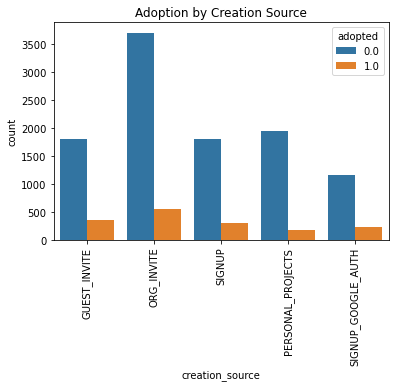

In [32]:
sns.countplot(x='creation_source', hue='adopted', data=df)
plt.title('Adoption by Creation Source')
plt.xticks(rotation=90)
plt.show()

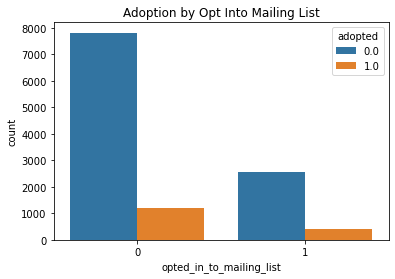

In [33]:
sns.countplot(x='opted_in_to_mailing_list', hue='adopted', data=df)
plt.title('Adoption by Opt Into Mailing List')
plt.show()

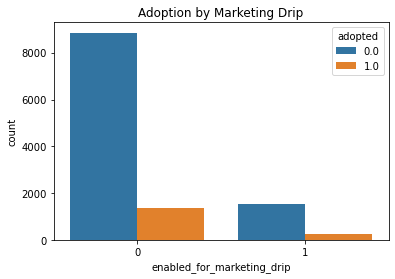

In [34]:
sns.countplot(x='enabled_for_marketing_drip', hue='adopted', data=df)
plt.title('Adoption by Marketing Drip')
plt.show()

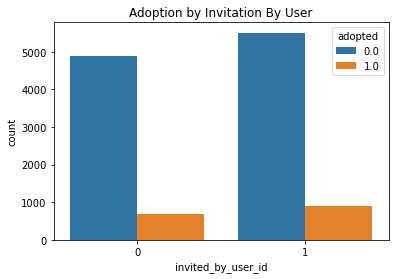

In [35]:
sns.countplot(x='invited_by_user_id', hue='adopted', data=df)
plt.title('Adoption by Invitation By User')
plt.show()

In [36]:
#mean number of visits of adopted users
print('mean number of vistis of adopted users:', sum(df[df['adopted'] == 1]['tot_visits']) / len(df[df['adopted'] == 1]))
#mean number of visits by not adopted users
print('mean number of vistis of not adopted users:', sum(df[df['adopted'] == 0]['tot_visits']) / len(df[df['adopted'] == 0]))

mean number of vistis of adopted users: 18.95505617977528
mean number of vistis of not adopted users: 11.905077899596076


In [37]:
print('number of organizations in org_id:', len(df.org_id.unique()))

number of organizations in org_id: 417


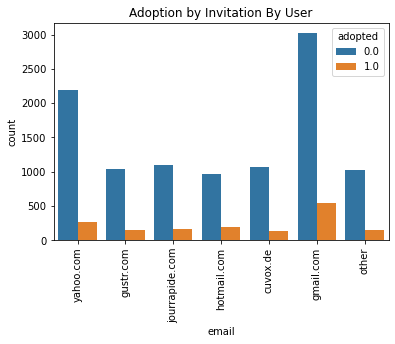

In [38]:
sns.countplot(x='email', hue='adopted', data=df)
plt.title('Adoption by Invitation By User')
plt.xticks(rotation=90)
plt.show()

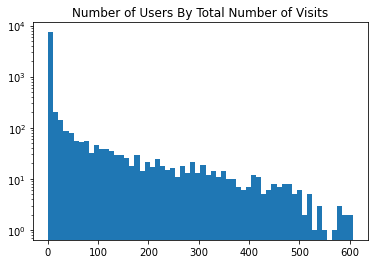

In [39]:
plt.hist(df2.groupby('user_id').visited.count(), bins = 60)
plt.title('Number of Users By Total Number of Visits')
plt.yscale('log')
plt.show()

In [40]:
df.groupby('adopted').mean()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,tot_visits,delta
adopted,,,,,,
0.0,0.248125,0.148682,138.742835,0.529333,11.905078,3.305828
1.0,0.258427,0.153558,162.276529,0.569913,18.955056,299.200999


Only total visits provides a clear distinction between adoption or not.  The rest of the EDA does not proved much in the way of a clear reason why there is a difference between adoption or not.  The histogram of visits by users demonstrates that by far most users visit the product a very few times.

# Modeling

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [42]:
#Create a copy of the original dataframe for modeling, will convert some of the catigorical data to dummy variables.
model_df = df.copy()

In [43]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   email                       12000 non-null  object        
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  12000 non-null  datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          12000 non-null  int32         
 8   adopted                     12000 non-null  float64       
 9   tot_visits                  12000 non-null  float64       
 10  delta                       12000 non-null  int16         
dtypes: datetime64[ns](2), float64(2), int16(1), int32(1), 

In [44]:
#Organization ID is categorical
model_df['org_id'] = model_df['org_id'].astype('category')

In [45]:
#Get dummies for creation source
model_df = pd.get_dummies(model_df, columns = ['creation_source'], drop_first=True)

In [46]:
#Get dummies for email domains
model_df = pd.get_dummies(model_df, columns = ['email'], drop_first=True)

In [47]:
#Remove creation time and last session being they are replaced by delta
model_df = model_df.drop(columns = ['creation_time', 'last_session_creation_time'])

In [48]:
model_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,tot_visits,delta,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_gmail.com,email_gustr.com,email_hotmail.com,email_jourrapide.com,email_other,email_yahoo.com
0,1,0,11,1,0.0,0.0,-1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,1.0,1.0,135,1,0,0,0,0,1,0,0,0,0
2,0,0,94,1,0.0,14.0,-1,1,0,0,0,0,1,0,0,0,0
3,0,0,1,1,0.0,1.0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,193,1,0.0,1.0,4,0,0,0,0,0,0,0,0,0,1


In [49]:
model_df.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'adopted', 'tot_visits', 'delta',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH',
       'email_gmail.com', 'email_gustr.com', 'email_hotmail.com',
       'email_jourrapide.com', 'email_other', 'email_yahoo.com'],
      dtype='object')

In [50]:
#Train test split for modeling
X_train, X_test, y_train, y_test = train_test_split(model_df.drop(columns = ['adopted']), model_df.adopted, test_size=0.3, random_state=42)

## Logistic Regression

In [51]:
#Create logistic regression classifier
lrc = LogisticRegression(max_iter=200, random_state = 42)

#Hyperparameter grid
log_params = {'penalty': ['l1', 'l2', 'none'], 
              'C' : [0.001, 0.1, 1, 10, 100]}

In [52]:
#Need to scale delta and total visits
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[['delta', 'tot_visits']])
X_test_scaled = scaler.fit_transform(X_test[['delta', 'tot_visits']])

In [53]:
#Fit logistic regression model
logReg_cv = GridSearchCV(lrc, log_params, n_jobs=5, cv=5, scoring='roc_auc')
logReg_cv.fit(X_train_scaled, y_train)

#Best accuracy score and hyperparameters for model
print("Best Score:" + str(logReg_cv.best_score_))
print("Best Parameters: " + str(logReg_cv.best_params_))

Best Score:0.9944265491379678
Best Parameters: {'C': 0.001, 'penalty': 'none'}


C:\Users\matta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [54]:
from sklearn.metrics import confusion_matrix

#Confusion matrix and classification report
logReg_pred = logReg_cv.predict(X_test_scaled)
print(confusion_matrix(y_test, logReg_pred))
print(classification_report(y_test, logReg_pred))

[[3094   20]
 [  57  429]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3114
         1.0       0.96      0.88      0.92       486

    accuracy                           0.98      3600
   macro avg       0.97      0.94      0.95      3600
weighted avg       0.98      0.98      0.98      3600



The above logistic regression model appears to be highly predictive.

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
#Creat random forest classifier
rfc = RandomForestClassifier(random_state = 42)

#Hyperparameter grid
param_grid = {'n_estimators': [300, 400, 500],
             'max_features': ['auto', 'sqrt'],
             'max_depth' : [9, 10, 11]}

In [57]:
#GridSearchCV for random forest
rfc_cv = GridSearchCV(rfc, param_grid, cv=5, scoring='roc_auc')
#build model    
rfc_cv.fit(X_train, y_train)
#predict using model
y_pred = rfc_cv.predict(X_test)

In [58]:
#Best accuracy score and hyperparameters for model
print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))

Best Score:0.9925081880882642
Best Parameters: {'max_depth': 9, 'max_features': 'auto', 'n_estimators': 500}


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3114
         1.0       0.94      0.88      0.91       486

    accuracy                           0.98      3600
   macro avg       0.96      0.94      0.95      3600
weighted avg       0.98      0.98      0.98      3600



In [60]:
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(0,2), columns=range(0,2))

,0,1
0,3087,27
1,56,430


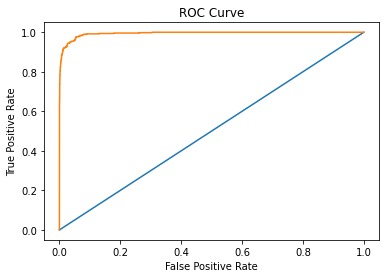

In [61]:
y_pred_proba = rfc_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba)

#plot ROC curve
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The random forest model appears to be highly predictive.

# Feature Importance

In [62]:
#Create dataframe for feature importance modeling
df = df.drop(columns = ['creation_time', 'last_session_creation_time'])

In [63]:
#convert catigorical data to codes so modeling can take place
df['email'] = pd.Categorical(df['email']).codes
df['creation_source'] = pd.Categorical(df['creation_source']).codes

In [68]:
#Making data codes catigorical
df['email'] = df['email'].astype("category")
df['creation_source'] = df['creation_source'].astype("category")
df['org_id'] = df['org_id'].astype("category")

In [69]:
df.head()

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,tot_visits,delta
0,6,0,1,0,11,1,0.0,0.0,-1
1,2,1,0,0,1,1,1.0,1.0,135
2,2,1,0,0,94,1,0.0,14.0,-1
3,6,0,0,0,1,1,0.0,1.0,0
4,6,0,0,0,193,1,0.0,1.0,4


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   email                       12000 non-null  category
 1   creation_source             12000 non-null  category
 2   opted_in_to_mailing_list    12000 non-null  int64   
 3   enabled_for_marketing_drip  12000 non-null  int64   
 4   org_id                      12000 non-null  category
 5   invited_by_user_id          12000 non-null  int32   
 6   adopted                     12000 non-null  float64 
 7   tot_visits                  12000 non-null  float64 
 8   delta                       12000 non-null  int16   
dtypes: category(3), float64(2), int16(1), int32(1), int64(2)
memory usage: 516.1 KB


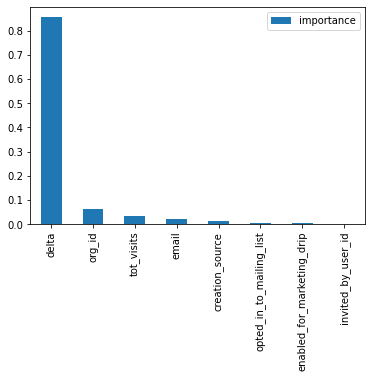

In [71]:
#Modeling for feature importance
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['adopted']), df.adopted, test_size=0.3, random_state=42)

rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar')
plt.show()

Time delta between creation time and last session was by far the most significant factor in determining adoption. Organization, and total visits appear to also have influence on adoption.  Both Random Forest and Logistic Regression produced highly predictive models with logistic regression being slightly more accurate with a 92% f1-score for predicting adoption.

# Conclusion

Through exploritory data analysis and modeling it was determined that the time difference between initial creation time and last session being the most predictive for adoption.  Organization and total visits have influence on user adoption.  A logistic regression model was produced from the data that predicts adoption with a 92% f1-score.  